In [1]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
from keras.preprocessing.image import ImageDataGenerator

In [2]:
data_paths=pd.read_csv('C:\\Users\\Az\\Desktop\\data_mask.csv')

In [3]:
images_paths=data_paths['image_path']
labels=data_paths['mask'].values
labels=to_categorical(labels)
path="C:/Users/Az/Working now/Brain_MRI/"

In [5]:
images=np.zeros((3929,256,256,3),dtype='float32')
for i in range(3929):
    img=cv2.imread(path+images_paths[i])
    images[i]=img/255

In [6]:
x_train,x_test,y_train,y_test = train_test_split(images,labels,test_size=0.4,shuffle=True)

In [7]:
train_datagen = ImageDataGenerator(
rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = "nearest")
test_datagen=ImageDataGenerator(
rotation_range = 15,
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
    fill_mode = "nearest")

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D , Flatten , MaxPool2D , BatchNormalization, Dropout,Dense
#Create the model
model=Sequential()
model.add(Conv2D(filters =32 , kernel_size=(3,3) , strides=(1,1) , activation ='relu' , padding = 'valid' , input_shape=(256, 256, 3)))
model.add(MaxPool2D(pool_size=(2,2) , padding='valid' ))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(2 , activation='softmax'))
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D , Flatten , MaxPool2D , BatchNormalization, Dropout,Dense
#Create the model
model=Sequential()
model.add(Conv2D(filters =32 , kernel_size=(3,3) , strides=(1,1) , activation ='relu' , padding = 'valid' , input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(7,7)))
model.add(Conv2D(filters =64 , kernel_size=(3,3) , strides=(1,1) , activation ='relu' , padding = 'valid'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Conv2D(filters =64 , kernel_size=(3,3) , strides=(1,1) , activation ='relu' , padding = 'valid'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(2 , activation='softmax'))
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 34, 34, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          3

In [12]:
history=model.fit(train_datagen.flow(x_train,y_train,batch_size=16),epochs=3 , validation_data=(x_test,y_test) , batch_size=16,steps_per_epoch=len(x_train)/16)

Epoch 1/3
147/147 [==============================] - 140s 948ms/step - loss: 0.2199 - accuracy: 0.9092 - val_loss: 0.2155 - val_accuracy: 0.9128
Epoch 2/3
147/147 [==============================] - 135s 912ms/step - loss: 0.2113 - accuracy: 0.9228 - val_loss: 0.3076 - val_accuracy: 0.8804
Epoch 3/3
147/147 [==============================] - 135s 915ms/step - loss: 0.1939 - accuracy: 0.9270 - val_loss: 0.2384 - val_accuracy: 0.8912


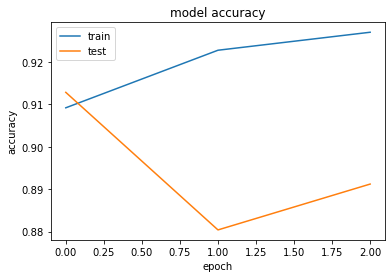

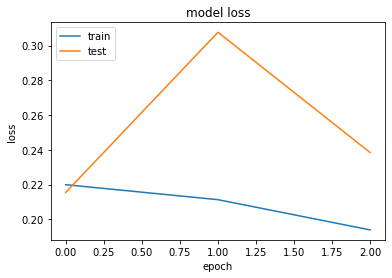

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [4]:
images_paths=data_paths['image_path']
labels=data_paths['mask'].values

In [5]:
images_paths

0       TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif
1       TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif
2       TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif
3       TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif
4       TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif
                              ...                        
3924    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...
3925    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...
3926    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...
3927    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...
3928    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...
Name: image_path, Length: 3929, dtype: object

In [8]:
images=np.zeros((3929,256,256,3),dtype='uint8')
for i in range(3929):
    img=cv2.imread(path+images_paths[i])
    images[i]=img

In [25]:
for i in range(3929):
    if labels[i]==0:
        plt.imsave('class 0/'+ 'im'+str(i)+'.png' , images[i])
    else :
        plt.imsave('class1/'+ 'im'+str(i)+'.png' , images[i])